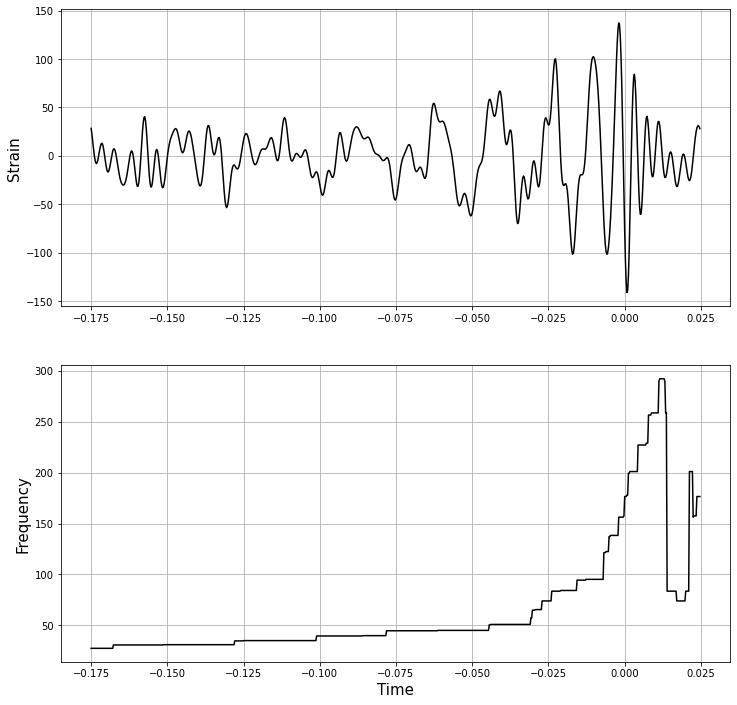

In [4]:
import numpy as np
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u 
data,freq,time=np.loadtxt('https://raw.githubusercontent.com/astroclubiitk/computational-astrophysics/main/Week-3/Assignment/GW_data_file.csv',delimiter=',')
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(time,data,color="k")
plt.grid()
plt.ylabel("Strain",size=15)
plt.subplot(212)
plt.plot(time,freq,color="k")
plt.grid()
plt.ylabel("Frequency",size=15)
plt.xlabel("Time",size=15)
plt.show()

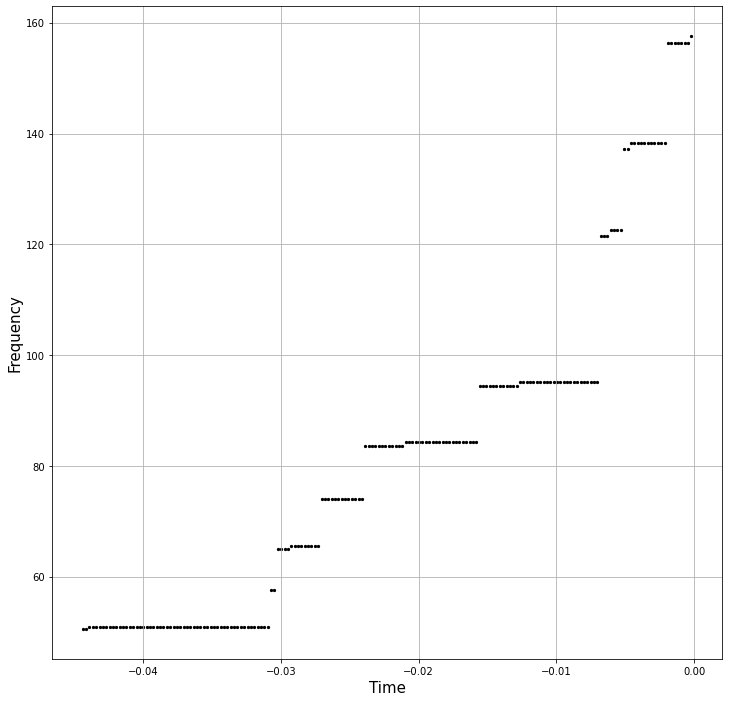

In [5]:
new_time=time[(freq>50) & (time<0)]
new_freq=freq[(freq>50) & (time<0)]
plt.figure(figsize=(12,12))
plt.scatter(new_time,new_freq,s=5,c="k")
plt.xlabel("Time",size=15)
plt.ylabel("Frequency",size=15)
plt.grid()
plt.show()

In [6]:
def f(t,m):
    return (-1/(m*t))**(3/8)
p_opt, p_cov = cf(f,new_time,new_freq)
print(p_opt)

[0.00076236]


<ipython-input-6-8e8dc5adeb65>:2: RuntimeWarning: invalid value encountered in power
  return (-1/(m*t))**(3/8)


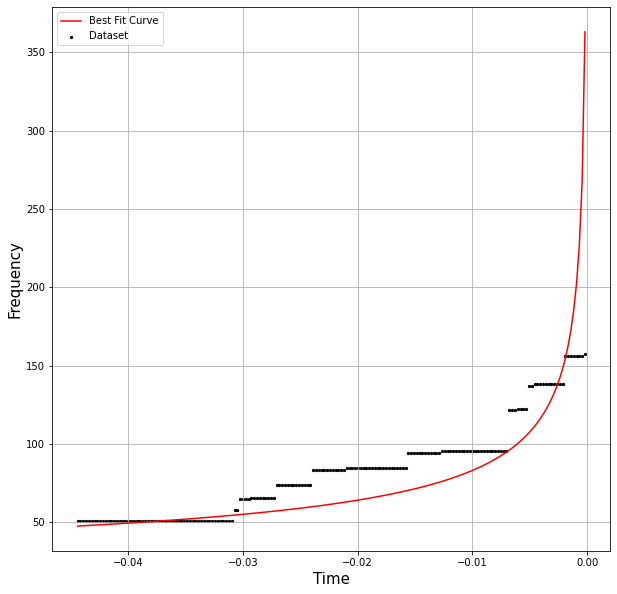

In [7]:
new_time = time[(freq>50) & (time<0)]
new_freq = freq[(freq>50) & (time<0)]
plt.figure(figsize=(10,10))
plt.scatter(new_time,new_freq,s=5,c="k",label="Dataset")
plt.plot(new_time,f(new_time,p_opt[0]),c="r",label="Best Fit Curve")
plt.xlabel("Time",size=15)
plt.ylabel("Frequency",size=15)
plt.grid()
plt.legend()
plt.show()

In [9]:
from astropy import constants as const
mass = ((5/((8*np.pi)**(8/3)))*(((const.c**3)/const.G)**(5/3))*((p_opt)*u.s**(5/3)))**(3/5)
print(mass/const.M_sun,"solar mass")

[41.29011047] solar mass
